<h1>Introduction to spreadsheets (Excel files)</h1>

Building pipelines to data stored in spreadsheets and additional data wrangling techniques

They store data in a tabular form and can have formatting and formulas with auto updating results.

Pandas does not import spreadsheet formatting, so we have to avoid using formatting to convey/give important information.

An Excel file or workbook can have multiple spreadsheets.

To import data from an spreadsheet using pandas we can use the 'read_excel()' function.

Formatting features that help human readers can make it trickier to read by machine.

They can contain:

- non-tabular information (like metadata headers)
- smaller tables of information. In order to use only their content, we can use different arguments to limit or skip columns and rows.

<h2>Some arguments to read_excel() function</h2>

- nrows: limit the number of rows to load
- skiprows: specify number of rows or row numbers to skip
- usecols: choose columns by name, positional number or a string of Excel column letter or ranges, like ("A:P")

Syntax:

surveyData = pd.read_excel('file.xlsx', skiprows = 2, usecols='W:AB, AR')
    
    It will skip the first two rows and will use the columns W to AB and the column AR.


In [1]:
import pandas as pd
# Create string of lettered columns to load
col_string = 'AD, AW:BA'#get the columns about future job goals

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx", 
                        skiprows=2, 
                        usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


<hr>
<h1>Getting data from multiple worksheets</h1>

We can specify sheets to get data from and also use a workflow to combine multiple sheets into a single dataframe.

By default the pandas function read_excel pulls data from the first sheet in a workbook only, this can be changed with the sheet_name keyword argument.

We have to keep in mind that sheets are zero-indexed.

If we load multiple sheets at once, any other arguments passed to the function apply to all sheets
<h2>sheet_name accepts:</h2> 

- An string with the name of the desired sheet
- An integer indicating it's position in the workbook
- A list containing any combination of sheet names and position numbers to read. 

<b>Note: if we load a sheet by its index position, the resulting dataframe's name is also the index number not the sheet name</b>

In [2]:
surveyDataNum = pd.read_excel('Datasets/fcc-new-coder-survey.xlsx', sheet_name=1)#Get the second sheet by it's possition

surveyDataName = pd.read_excel('Datasets/fcc-new-coder-survey.xlsx', sheet_name='2017')#Get the second sheet by name

print(surveyDataNum.equals(surveyDataName))

True


<h1>Load all sheets</h1>

To do this we just have to pass None to the sheet_name argument. We just have to keep in mind that every other argument will apply to all sheets.
When we do this, we get an ordered dictionary in which the keys are the sheet names and the values are dataframes for each sheet

<h2>Putting it all together</h2>

We can iterate the dictionary and just add a column to distinguish the rows from different sheets.

In [3]:
surveys = pd.read_excel('Datasets/fcc-new-coder-survey.xlsx', sheet_name=None)

print(type(surveys))

<class 'dict'>


In [4]:
allSurveys = pd.DataFrame()#It will hold all loaded sheets

for sheetName, frame in surveys.items():
    #Add column to distinguish the source sheet
    frame['Year'] = sheetName

    #Add the dataframe to allSurveys
    allSurveys = allSurveys.append(frame)

print(allSurveys.Year.unique())

['2016' '2017']


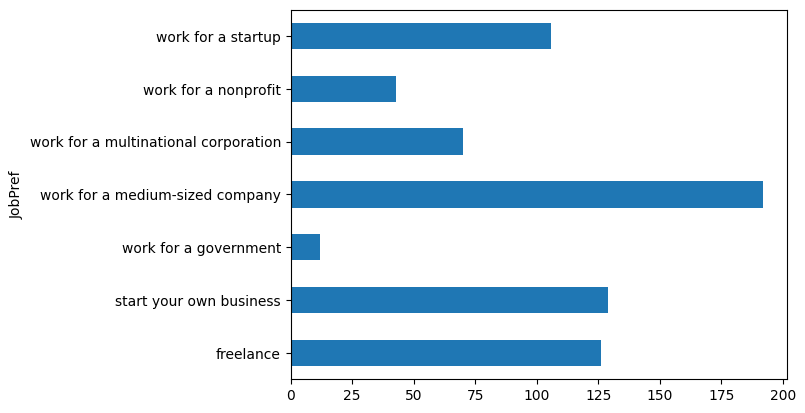

In [5]:
import matplotlib.pyplot as plt
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx",
                               sheet_name=1,skiprows=2, 
                        usecols=col_string)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

Adding 1000 rows
Adding 1000 rows


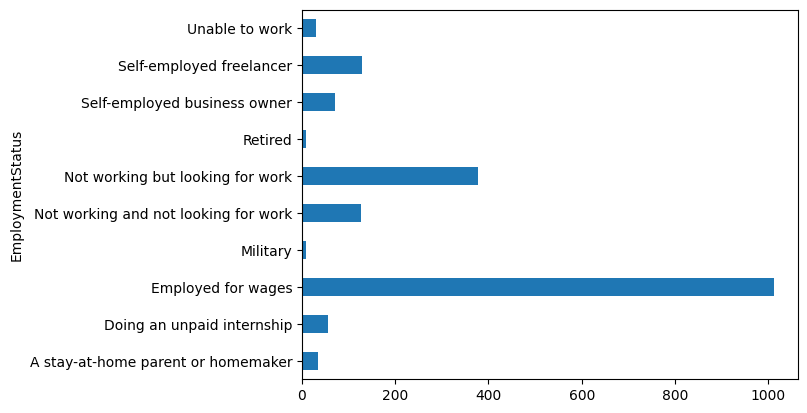

In [6]:
# Create an empty dataframe
all_responses = pd.DataFrame()
responses = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx",
                               sheet_name=None,skiprows=2)
# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

<hr>
<h1>Modifying imports: True/False data</h1>

In order to import booleans variables specified as Yes/No, 1 or 0, True/False... we can use the dtype argumnet which works in the same way as the one used for reading flat files. It receives a dictionary with the column name as the key and the value representing the data type.

We have to be careful because if we cast a column as a boolean, all the NA (missing values) records will be stated as true. If you want to make a column with NA values Boolean, you can load the data, impute missing values, then re-cast the column as Boolean.

Pandas recognize that 0 and 1 are False and True so with this type of column we just have to cast it to boolean, but pandas will not know how to handle Yes/No, so all these values will be coded as True.

In order to change this misunderstanding, we can use these parameters:

- true_values: to set custom True values
- false_values: to set custom False values

They both takes a list of values that pandas will interpret as True or False when they appear in Boolean columns.

In [7]:
# Load the data
survey_data = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx",skiprows=2)

# Count NA values in each column
print(survey_data.isna().sum())

# View financial burdens by Boolean group
print(survey_data.groupby('HasDebt').sum())

Age                   13
AttendedBootcamp       6
BootcampFinish       965
BootcampLoanYesNo    964
BootcampName         968
                    ... 
ResourceUdemy        680
ResourceW3Schools    995
SchoolDegree           8
SchoolMajor          371
StudentDebtOwe       740
Length: 98, dtype: int64
             Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
HasDebt                                                                 
0.0      13343.0              10.0             5.0                1.0   
1.0      16012.0              26.0            16.0               13.0   

         BootcampRecommend  ChildrenNumber  CodeEventConferences  \
HasDebt                                                            
0.0                    5.0           109.0                 149.0   
1.0                   21.0           286.0                 132.0   

         CodeEventDjangoGirls  CodeEventGameJam  CodeEventGirlDev  ...  \
HasDebt                                                     

In [8]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx", skiprows=2, usecols='AH')

# View the data
survey_subset[survey_subset.isna()] = 0#First we set the NA value to false

survey_subset['HasDebt'] = survey_subset['HasDebt'].astype(bool)#Finally we can cast the column as a bool data type

print(survey_subset.dtypes)


HasDebt    bool
dtype: object


<h1>Modifying imports: Parsing dates</h1>

Datetimes can be translated into string representations. There is a common set of codes used to describe how datetimes are formatted as strings.

By default, pandas loads datetime as objects. If we want to arrange records by time, we have to select within a timespan or calculate 
intervals.

<h2>parse_dates</h2>
In order to parse dates we use the parse_dates argument to specify datetime columns. 

It accepts:

- A list of column names or numbers to parse. 
- A list of lists of columns to combine and parse. This is useful when we have in separate columns the day, and month... and we want to combine them. When we do this, the df will have a unique column in which the name will be the union of all the names.
- A dictionary where the keys are the new column names and values are lists of columns to parse together. Note that the keys in a dictionary passed to parse_dates cannot be names of columns already in the dataframe. Also, when combining columns to parse, their order in the list does not matter.

Parse dates only works if the data is in a format that pandas understand, in order to parse non-standard formats we have to do it after the import and use the pd.to_datetime() method. This method takes the dataFrame and column to convert, plus a format argument which is a string describing how the data is formatted.

We can check different string formatting at <a href='https://strftime.org'>strftime</a> for the full list

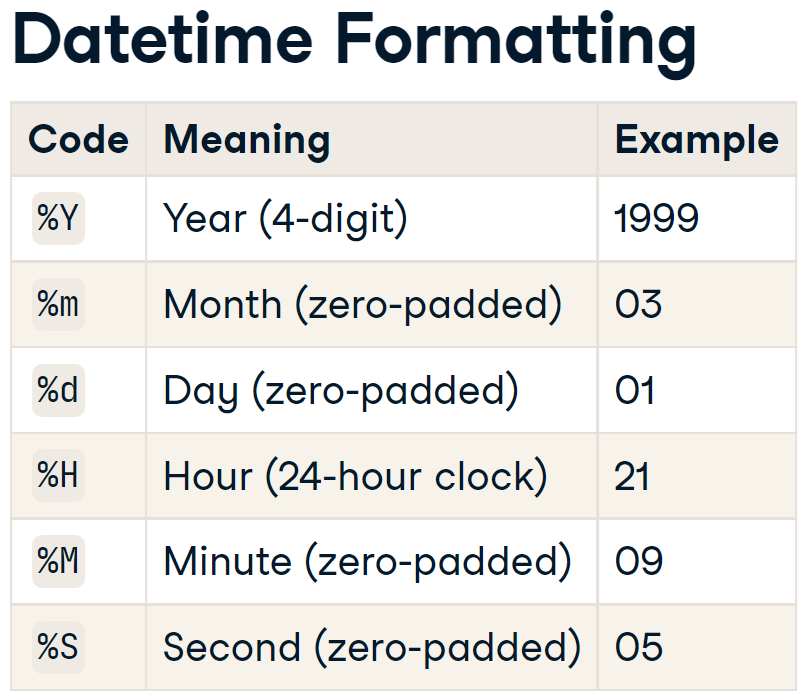

We can even parse standalone times, without dates, but the parsed times will have the date the code was run

In [ ]:
dateFormat = '%m%d%Y %H:%M:%S'
survey_data['Part2EndTime'] = pd.to_datetime(survey_data['Part2EndTime'], format=dateFormat)

In [9]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx",
                            parse_dates=['Part1StartTime'], skiprows=2)

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())
# View summary statistics about Part2Start
print(survey_data.Part1StartTime.describe())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]
count                    1000
unique                    991
top       2016-03-30 01:27:09
freq                        2
first     2016-03-29 21:21:37
last      2016-03-30 09:03:45
Name: Part1StartTime, dtype: object


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_16808\2498181549.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(survey_data.Part1StartTime.describe())
